# Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

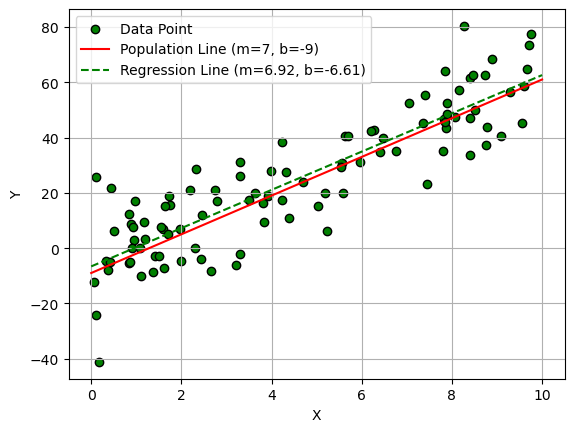

In [2]:
x = 10 * np.random.rand(100)
y = 7 * x - 9 + np.random.randn(100) * 12

x = x.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

plt.scatter(x,y,label ="Data Point",color="green",edgecolor="black",)
plt.xlabel("X")
plt.ylabel('Y')

x_line = np.linspace(0,10,100)
y_actual = 7*x_line - 9
plt.plot(x_line,y_actual, "r-",label = "Population Line (m=7, b=-9)")

y_predicted = model.coef_[0]*x_line + model.intercept_
plt.plot(x_line,y_predicted,"g--",label = f"Regression Line (m={model.coef_[0]:.2f}, b={model.intercept_:.2f})")
plt.legend(loc ="upper left")
plt.grid()
plt.show()

In [3]:
data = pd.read_csv(r"advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
X = data[["TV","Radio","Newspaper"]]
X = sm.add_constant(X)

Y = data["Sales"]

model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.13e-99
Time:                        10:45:37   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [52]:
# generate synthetic data
np.random.seed(42)
n = 100
x1 = np.random.normal(0,1,n)
x2 = np.random.normal(0,1,n)
irrelevant_feature = np.random.normal(0,1,(n,10))

# getting y
y = 2*x1 + 3*x2 + np.random.normal(0,1,n)

# r2 score formulae
def adjusted_r2(r2,n,k):
    return 1 - ((1 - r2) * (n - 1)/(n - k - 1))    

X1 = pd.DataFrame({"x1": x1, "x2": x2})
x_with_irrelevant = pd.concat([X1] + [pd.Series(irrelevant_feature[:,i], name =f"irrelevant_{i}") for i in range(10)],axis=1)


In [69]:
model1 = LinearRegression().fit(X1,y)
model2 = LinearRegression().fit(x_with_irrelevant,y)

models = [("Model with relevant features",model1,X1.shape[1]),("Model with irrelevant features",model2,x_with_irrelevant.shape[1])]

for name,model,k in models:
    r2 = r2_score(y, model.predict(x_with_irrelevant.iloc[:,:k]))
    n = x_with_irrelevant.shape[0]
    adj_r2 = adjusted_r2(r2,n,k)
    print(f"{name}: R-squared = {r2:.3f}, Adjusted R-squared = {adj_r2:.3f}")

Model with relevant features: R-squared = 0.912, Adjusted R-squared = 0.910
Model with irrelevant features: R-squared = 0.919, Adjusted R-squared = 0.908


In [70]:
df = pd.DataFrame()

df['X'] = [2,3,5,5,7]
df['y'] = [2,4,3,5,5]

df

,X,y
0,2,2
1,3,4
2,5,3
3,5,5
4,7,5


In [75]:
x_x = df['X']
x_x = sm.add_constant(x_x)
y_y = df["y"]

model3 = sm.OLS(y_y,x_x).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     3.380
Date:                Tue, 03 Oct 2023   Prob (F-statistic):              0.163
Time:                        10:34:15   Log-Likelihood:                -5.9769
No. Observations:                   5   AIC:                             15.95
Df Residuals:                       3   BIC:                             15.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6579      1.253      1.323      0.2

C:\Users\rawat\AppData\Local\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
